In [1]:
import numpy as np
import quandl
import pandas as pd
import matplotlib.pyplot as plt

# Download 'Daily Treasury Yield Curve Rate'

In [3]:
df = quandl.get("USTREASURY/YIELD", authtoken= authtoken)

In [4]:
df

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,3.73,4.00,4.22,4.57,4.66,4.51,4.45,4.27,4.18,4.10,4.44,4.22
2022-11-01,3.72,4.00,4.23,4.58,4.75,4.54,4.48,4.27,4.18,4.07,4.37,4.14
2022-11-02,3.70,4.01,4.22,4.57,4.76,4.61,4.54,4.30,4.20,4.10,4.41,4.15


'''
The above rates are generally refered to as 'Constant Maturity Treasury' rates.

Yields are interpolated by the Treasury from the daily yield curve.

Daily Treasury par yield curve, relating the par yield on a securty to its time
to maturity, is based on the closing market bid prices on. the most recently auctioned Treasury
securities in the over-the-counter market. The par yields are then derived from input market prices.

The treasury official yield cruve is a par yield curve derived using a monotone convex method.
The input prices are converted to yields and used to bootstrap the instataneous forward rates
at the input maturity points so that these instruments are sequentially 
priced without error.

'''

# Build a Jupyter Notebook for the following assignment

a. Download the dataset into pandas dataframe

In [5]:
df

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,3.73,4.00,4.22,4.57,4.66,4.51,4.45,4.27,4.18,4.10,4.44,4.22
2022-11-01,3.72,4.00,4.23,4.58,4.75,4.54,4.48,4.27,4.18,4.07,4.37,4.14
2022-11-02,3.70,4.01,4.22,4.57,4.76,4.61,4.54,4.30,4.20,4.10,4.41,4.15


b. Remove '1M' column and use the date from 1/1/2000 - 1/1/2018

In [6]:
df = df.drop(columns = ['1 MO'])
date1 = '2000-01-01'
date2 = '2018-01-01'
df = df[(df.index >= date1) & (df.index <= date2)]

In [7]:
df

,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2000-01-03,NaN,5.48,5.81,6.09,6.38,6.42,6.50,6.65,6.58,6.94,6.61
2000-01-04,NaN,5.43,5.75,6.00,6.30,6.34,6.40,6.56,6.49,6.84,6.53
2000-01-05,NaN,5.44,5.74,6.05,6.38,6.43,6.51,6.68,6.62,6.95,6.64
2000-01-06,NaN,5.41,5.69,6.03,6.35,6.39,6.46,6.63,6.57,6.86,6.58
2000-01-07,NaN,5.38,5.66,6.00,6.31,6.35,6.42,6.58,6.52,6.82,6.55
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,NaN,1.33,1.54,1.73,1.91,2.01,2.26,2.40,2.48,2.68,2.83
2017-12-26,NaN,1.47,1.52,1.75,1.92,2.02,2.25,2.38,2.47,2.66,2.82
2017-12-27,NaN,1.44,1.53,1.75,1.89,1.99,2.22,2.34,2.42,2.59,2.75


c. Construct series of daily difference

In [8]:
df_dif = df.diff()

In [9]:
df_dif

,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,-0.05,-0.06,-0.09,-0.08,-0.08,-0.10,-0.09,-0.09,-0.10,-0.08
2000-01-05,NaN,0.01,-0.01,0.05,0.08,0.09,0.11,0.12,0.13,0.11,0.11
2000-01-06,NaN,-0.03,-0.05,-0.02,-0.03,-0.04,-0.05,-0.05,-0.05,-0.09,-0.06
2000-01-07,NaN,-0.03,-0.03,-0.03,-0.04,-0.04,-0.04,-0.05,-0.05,-0.04,-0.03
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,NaN,-0.02,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,-0.01
2017-12-26,NaN,0.14,-0.02,0.02,0.01,0.01,-0.01,-0.02,-0.01,-0.02,-0.01
2017-12-27,NaN,-0.03,0.01,0.00,-0.03,-0.03,-0.03,-0.04,-0.05,-0.07,-0.07


In [10]:
df_dif.isna().sum()

2 MO     4504
3 MO        7
6 MO        1
1 YR        1
2 YR        1
3 YR        1
5 YR        1
7 YR        1
10 YR       1
20 YR       1
30 YR     996
dtype: int64

In [11]:
df_dif = df_dif.drop(columns = ['2 MO','30 YR'])
df_dif = df_dif[1:]
df_dif = df_dif.fillna(method = 'ffill') #for 3 MO
df_dif

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR
Date,,,,,,,,,
2000-01-04,-0.05,-0.06,-0.09,-0.08,-0.08,-0.10,-0.09,-0.09,-0.10
2000-01-05,0.01,-0.01,0.05,0.08,0.09,0.11,0.12,0.13,0.11
2000-01-06,-0.03,-0.05,-0.02,-0.03,-0.04,-0.05,-0.05,-0.05,-0.09
2000-01-07,-0.03,-0.03,-0.03,-0.04,-0.04,-0.04,-0.05,-0.05,-0.04
2000-01-10,0.04,-0.02,0.07,0.07,0.07,0.07,0.04,0.05,0.04
...,...,...,...,...,...,...,...,...,...
2017-12-22,-0.02,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00
2017-12-26,0.14,-0.02,0.02,0.01,0.01,-0.01,-0.02,-0.01,-0.02
2017-12-27,-0.03,0.01,0.00,-0.03,-0.03,-0.03,-0.04,-0.05,-0.07


d. Compute correlations and volatilities among the series(using level data)

In [12]:
df.isna().sum()

2 MO     4504
3 MO        3
6 MO        0
1 YR        0
2 YR        0
3 YR        0
5 YR        0
7 YR        0
10 YR       0
20 YR       0
30 YR     994
dtype: int64

In [16]:
df

,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,
2000-01-03,NaN,5.48,5.81,6.09,6.38,6.42,6.50,6.65,6.58,6.94,6.61
2000-01-04,NaN,5.43,5.75,6.00,6.30,6.34,6.40,6.56,6.49,6.84,6.53
2000-01-05,NaN,5.44,5.74,6.05,6.38,6.43,6.51,6.68,6.62,6.95,6.64
2000-01-06,NaN,5.41,5.69,6.03,6.35,6.39,6.46,6.63,6.57,6.86,6.58
2000-01-07,NaN,5.38,5.66,6.00,6.31,6.35,6.42,6.58,6.52,6.82,6.55
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,NaN,1.33,1.54,1.73,1.91,2.01,2.26,2.40,2.48,2.68,2.83
2017-12-26,NaN,1.47,1.52,1.75,1.92,2.02,2.25,2.38,2.47,2.66,2.82
2017-12-27,NaN,1.44,1.53,1.75,1.89,1.99,2.22,2.34,2.42,2.59,2.75


In [21]:
df_level = df.drop(columns = ['2 MO','30 YR'])
df_level = df_level.fillna(method = 'ffill')

In [22]:
df_level

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR
Date,,,,,,,,,
2000-01-03,5.48,5.81,6.09,6.38,6.42,6.50,6.65,6.58,6.94
2000-01-04,5.43,5.75,6.00,6.30,6.34,6.40,6.56,6.49,6.84
2000-01-05,5.44,5.74,6.05,6.38,6.43,6.51,6.68,6.62,6.95
2000-01-06,5.41,5.69,6.03,6.35,6.39,6.46,6.63,6.57,6.86
2000-01-07,5.38,5.66,6.00,6.31,6.35,6.42,6.58,6.52,6.82
...,...,...,...,...,...,...,...,...,...
2017-12-22,1.33,1.54,1.73,1.91,2.01,2.26,2.40,2.48,2.68
2017-12-26,1.47,1.52,1.75,1.92,2.02,2.25,2.38,2.47,2.66
2017-12-27,1.44,1.53,1.75,1.89,1.99,2.22,2.34,2.42,2.59


In [23]:
df_level.corr()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR
3 MO,1.000000,0.998193,0.993822,0.977425,0.958396,0.913589,0.870946,0.821319,0.715881
6 MO,0.998193,1.000000,0.997762,0.983138,0.964378,0.918988,0.875171,0.825171,0.717673
1 YR,0.993822,0.997762,1.000000,0.991905,0.977032,0.936152,0.894237,0.845398,0.739639
2 YR,0.977425,0.983138,0.991905,1.000000,0.995432,0.968336,0.934596,0.889709,0.791502
3 YR,0.958396,0.964378,0.977032,0.995432,1.000000,0.986695,0.961404,0.922254,0.833215
5 YR,0.913589,0.918988,0.936152,0.968336,0.986695,1.000000,0.992627,0.969384,0.903186
7 YR,0.870946,0.875171,0.894237,0.934596,0.961404,0.992627,1.000000,0.990341,0.944591
10 YR,0.821319,0.825171,0.845398,0.889709,0.922254,0.969384,0.990341,1.000000,0.978859
20 YR,0.715881,0.717673,0.739639,0.791502,0.833215,0.903186,0.944591,0.978859,1.000000


In [24]:
df_level.std()

3 MO     1.917046
6 MO     1.940203
1 YR     1.879407
2 YR     1.798644
3 YR     1.701660
5 YR     1.524855
7 YR     1.398180
10 YR    1.257239
20 YR    1.220155
dtype: float64

e.	Compute correlations and volatilities among the series (using daily differences)

In [25]:
df_dif.corr()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR
3 MO,1.000000,0.794583,0.648080,0.445703,0.419661,0.383913,0.360702,0.346773,0.327119
6 MO,0.794583,1.000000,0.859851,0.651933,0.624793,0.578598,0.547411,0.528397,0.497546
1 YR,0.648080,0.859851,1.000000,0.840749,0.806988,0.749838,0.707713,0.675972,0.624195
2 YR,0.445703,0.651933,0.840749,1.000000,0.960893,0.905043,0.852343,0.804175,0.720798
3 YR,0.419661,0.624793,0.806988,0.960893,1.000000,0.954314,0.911466,0.868234,0.786635
5 YR,0.383913,0.578598,0.749838,0.905043,0.954314,1.000000,0.976123,0.947837,0.881675
7 YR,0.360702,0.547411,0.707713,0.852343,0.911466,0.976123,1.000000,0.979831,0.934359
10 YR,0.346773,0.528397,0.675972,0.804175,0.868234,0.947837,0.979831,1.000000,0.968338
20 YR,0.327119,0.497546,0.624195,0.720798,0.786635,0.881675,0.934359,0.968338,1.000000


In [26]:
df_dif.std()

3 MO     0.052992
6 MO     0.044379
1 YR     0.045685
2 YR     0.058956
3 YR     0.064634
5 YR     0.072077
7 YR     0.075718
10 YR    0.075598
20 YR    0.078596
dtype: float64

f.	Plot the volatility curves computed in 2d & 2e

In [27]:
x = [0.25, 0.5, 1, 2, 3, 5, 7, 10, 20]

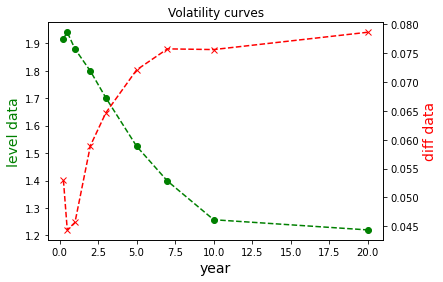

In [31]:
fig,ax = plt.subplots()
plt.title("Volatility curves")
ax.plot(x, df_level.std(), "go--")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("level data",color="green",fontsize=14)

ax2=ax.twinx()
ax2.plot(x, df_dif.std(), "rx--")
ax2.set_ylabel("diff data",color="red",fontsize=14)
plt.show()

# Independent Reading

a. What is the difference between a physical settlement of futures and cash-settlement?

Cash settlement is more popular and brings liqudity to the market. It is also
simpler and more convenient than physical settlement.

Eurodollar future is cash settled while bond future is settled witha treasury bond.

b. collateralized LIBOR forward contracts are different from Eurodollar because collateralized
forward curves have convexity that is dependent on collaterlization. Also, forward is influenced by present value 
while Eurodollat future is influenced by the rate